# Visualización

In [2]:
library(ggplot2)
library(openxlsx)
library(ggcorrplot)
library(dplyr)
library(tidyr)

In [3]:
setwd("/Users/ppando/Materias/data/materias/exploracion-visualizacion/R")

In [6]:
paises <- read.table("paises.csv", sep = ";", header = TRUE)
head(paises)

,Pais,Poblacion_2020,Cambio_porc_anual,Cambio_neto_anual,Densidad,Area,Migrantes,Tasa_de_crecimiento,Edad_promedio,Poblacion_urbana,Porc_mundial,Code,Continente,PBI,Poblacion
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>
1,Afghanistan,39074280,2.33,886592,60,652860,-62920,4.6,18,25,0.50,AFG,Asia,19469,34656032
2,Albania,2877239,-0.11,-3120,105,27400,-14000,1.6,36,63,0.04,ALB,Europe,11864,2876101
3,Algeria,43984569,1.85,797990,18,2381740,-10000,3.1,29,73,0.56,DZA,Africa,159049,40606052
4,American Samoa,55169,-0.22,-121,276,200,NA,NA,NA,88,0.00,ASM,America,658,55599
5,Andorra,77287,0.16,123,164,470,NA,NA,NA,88,0.00,AND,Europe,2859,77281
6,Angola,33032075,3.27,1040977,26,1246700,6413,5.6,17,67,0.42,AGO,Africa,95335,28813463


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 24 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”


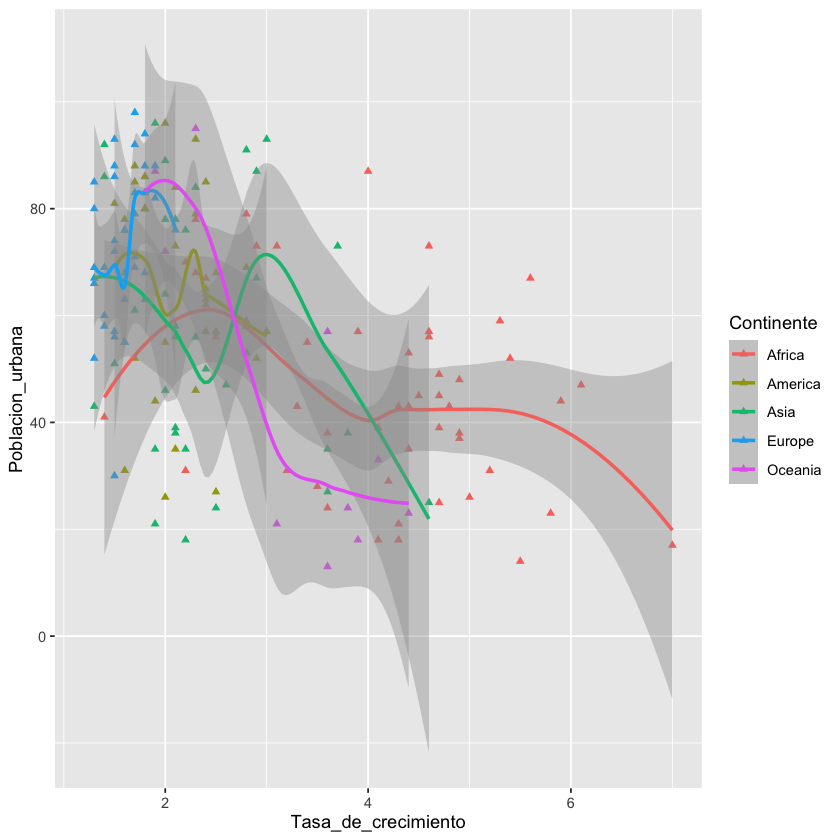

In [7]:
ggplot(paises, aes(x=Tasa_de_crecimiento, y=Poblacion_urbana, color = Continente)) + 
    geom_point(shape = 17) + 
    geom_smooth()

In [9]:
autos <- read.xlsx("autos.xlsx")
head(autos)

,Rendimiento.(millas.por.galon),Cilindrada,HP,Peso,Aceleracion,Modelo,Marca,X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,18,8,130,3504,12.0,70,chevrolet,NA
2,14,8,220,4354,9.0,70,chevrolet,NA
3,15,8,150,3761,9.5,70,chevrolet,NA
4,10,8,200,4376,15.0,70,chevrolet,NA
5,28,4,90,2264,15.5,71,chevrolet,NA
6,17,6,100,3329,15.5,71,chevrolet,NA


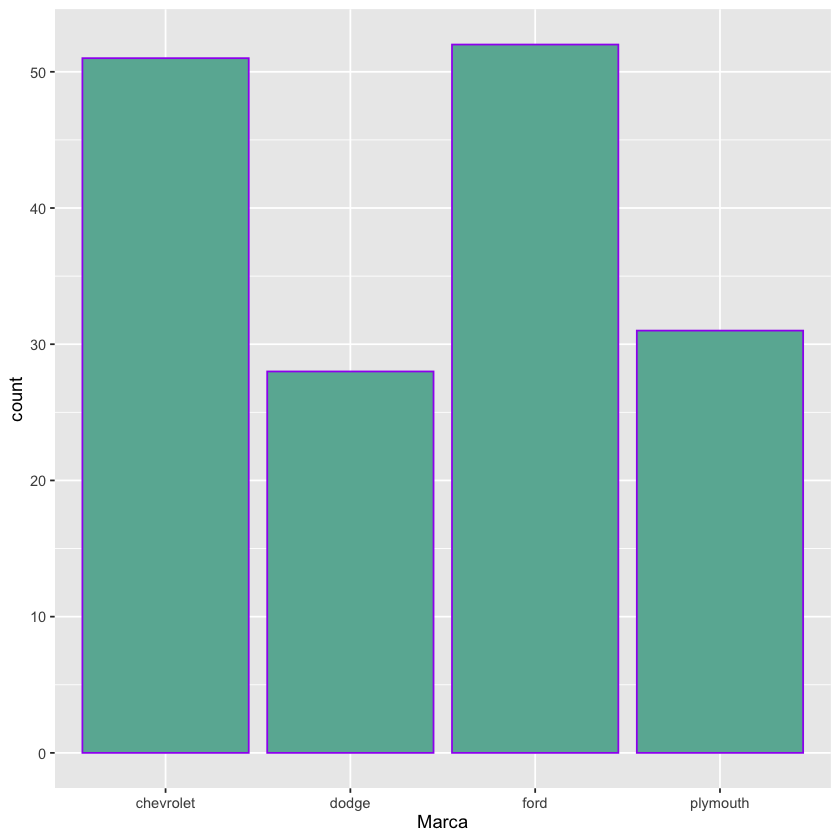

In [10]:
ggplot(data = autos, aes(x = Marca)) + 
    geom_bar(color="purple", fill="#69b3a2")

In [14]:
autos_a_corr <- autos %>% select("Rendimiento.(millas.por.galon)", "HP", "Peso", "Aceleracion")
head(autos_a_corr)

,Rendimiento.(millas.por.galon),HP,Peso,Aceleracion
,<dbl>,<dbl>,<dbl>,<dbl>
1,18,130,3504,12.0
2,14,220,4354,9.0
3,15,150,3761,9.5
4,10,200,4376,15.0
5,28,90,2264,15.5
6,17,100,3329,15.5


In [15]:
autos_corr <- round(cor(autos_a_corr), 2)

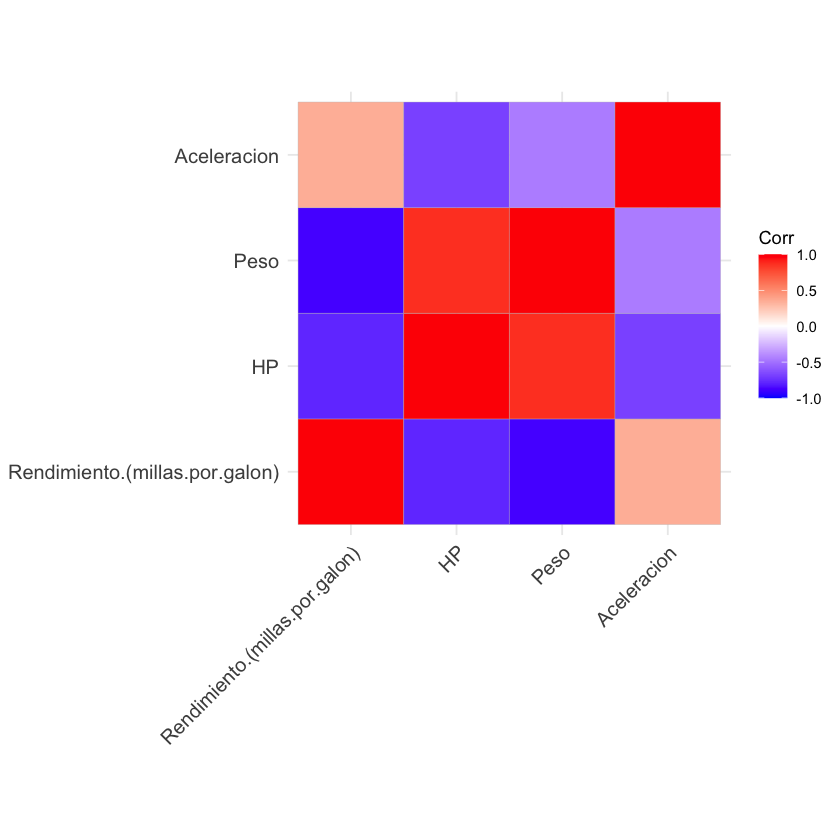

In [16]:
ggcorrplot(autos_corr)

In [17]:
nombres <- read.table("historico-nombres.csv", sep = ",", header = TRUE)
head(nombres)

,X,nombre,cantidad,anio
,<int>,<chr>,<int>,<int>
1,1,Maria,314,1922
2,2,Rosa,203,1922
3,3,Jose,163,1922
4,4,Maria Luisa,127,1922
5,5,Carmen,117,1922
6,6,Ana,113,1922


In [18]:
df_graficar_anio <- nombres %>% 
    filter(nombre %in% c("Clara", "Rodrigo", "Lucas", "Jessica", "Guillermo",
                         "Ana", "Ruben", "Erika", "Sebastian", "Federico",
                         "Alejandra", "Elsa", "Nicolas", "Florencia", "Laura",
                         "Rodolfo", "Eduardo", "Mariel", "Mariano", "Elisa", 
                         "Nahuel", "Pablo", "Leandro", "Federico", "Yesica", "Christian", 
                         "Carlos", "Leticia", "Matias", "Melania", "Jesus", "Martina", "Diego"),
           anio >= 1950,
           anio <  2010) %>% 
    select(-X) %>% 
    mutate(decada = anio %/% 10 * 10)

In [19]:
df_graficar_decada <- df_graficar_anio %>% 
    select(-anio) %>% 
    group_by(nombre, decada) %>% 
    summarise(cantidad = sum(cantidad))

`summarise()` has grouped output by 'nombre'. You can override using the
`.groups` argument.


In [20]:
nombres <- df_graficar_decada %>% 
    pivot_wider(names_from = decada, values_from = cantidad)

In [21]:
nombres <- as.data.frame(nombres)

In [22]:
rownames(nombres) <- nombres$nombre

In [23]:
nombres <- nombres[-1]

In [24]:
nombres <- as.matrix(nombres)

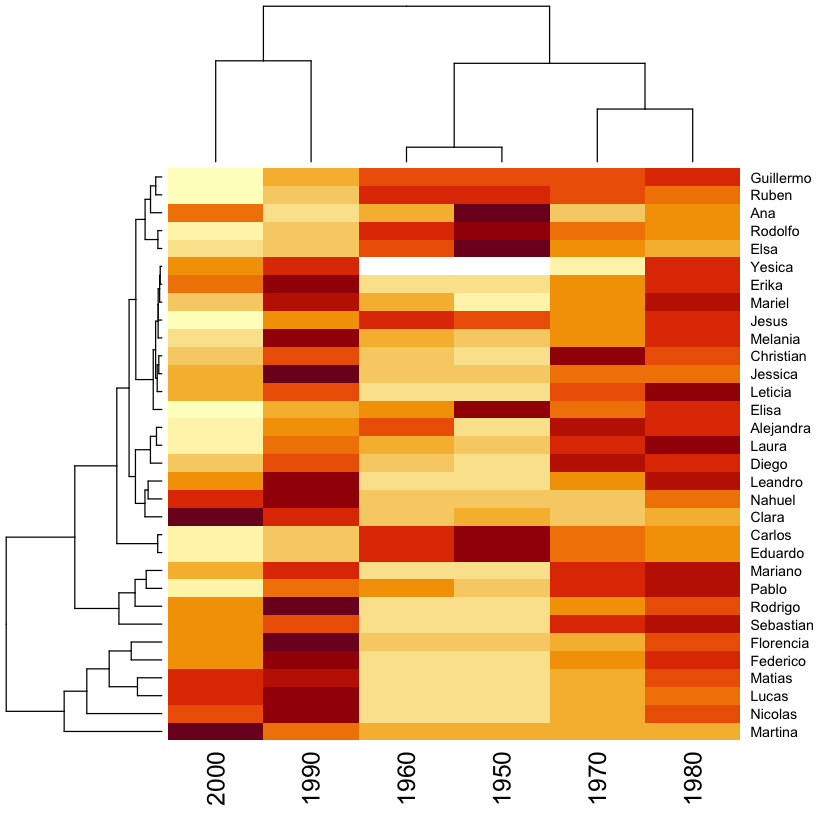

In [25]:
heatmap(nombres)

## Ejercicios

Instalar la librería dslabs y cargar la base de datos "gapminder" contenida dentro de esta librería con la función "data()". A partir de esta base de datos responder resolver los siguiente ítems:
* Realizar un diagrama de dispersión para el año 1960 entre las variables fertilidad y expecativa de vida, y agregarle una línea de tendencia

In [26]:
library(dslabs)

In [27]:
bd <- dslabs::gapminder
head(bd)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [ ]:
bd <- bd %>% filter(year == 1960)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 187 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 187 rows containing missing values or values outside the scale range
(`geom_point()`).”


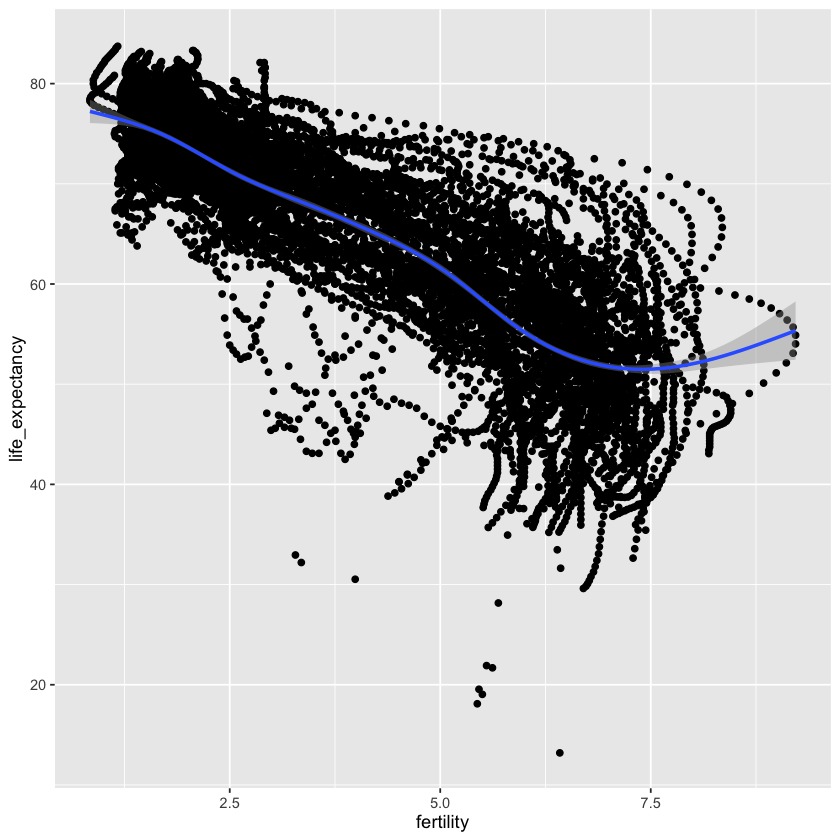

In [28]:
ggplot(bd, aes(x=fertility, y=life_expectancy)) + 
    geom_point() + 
    geom_smooth()

Realizar el diagrama del punto anterior por continente y comparar

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 187 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 187 rows containing missing values or values outside the scale range
(`geom_point()`).”


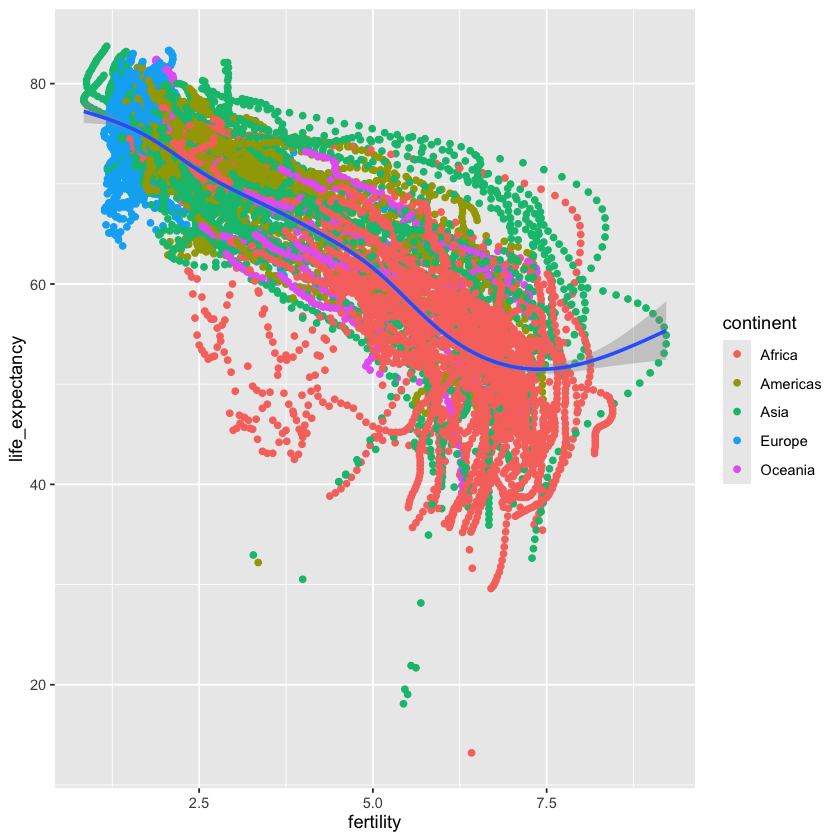

In [29]:
ggplot(bd, aes(x=fertility, y=life_expectancy)) + 
    geom_point(aes(color = continent)) + 
    geom_smooth()